# Laboratory work №1. Potentials method

You need to implement the modified potentials method and show how it works on any dataset.

### This notebook features: 
    - Picture import
    - Two encoding functions
    - Distance measure
    - Comparison matrix between pictures
    - Pattern search method (pattern in bigger picture)

In [222]:
import imageio
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [223]:
# get all the poctures
pics = []
for image_path in glob.glob("nr3_pics/*.bmp"):
    image = imageio.imread(image_path)
    pics.append(np.array(image)) 
#hack because weird picture:
tests = pics[11:15]
a = pics[15]
pics = pics[:11]
pics.append(a)

## Function Definitions

In [211]:
#display function
def display(image,nbrs = False):
    plt.imshow(image)
    if nbrs == True:
        print(image)
    plt.show()

In [195]:
#returns vanilla potential
def encode_vanilla(image):
    potential = np.zeros((len(image),len(image[0])))
    for x in range(len(image)):
        for y in range(len(image[0])):
            if image[x][y] == 0: 
                potential[x][y] = 1
    return potential   

In [196]:
#returns our improved potential
def encode_improved(image):
    potential = np.zeros((len(image),len(image[0])))
    for x in range(len(image)):
        for y in range(len(image[0])):
            if image[x][y] == 0: 
                if x>0 and y>0: 
                    potential[x-1:x+2,y-1:y+2] += 0.5
                    potential[x][y] +=0.5
                else:
                    if x== 0 and y == 0: 
                        potential[x:x+2,y:y+2] += 0.5
                        potential[x][y] +=0.5
                    elif x == 0:
                        potential[x:x+2,y-1:y+2] += 0.5
                        potential[x][y] +=0.5
                    elif y == 0:
                        potential[x-1:x+2,y:y+2] += 0.5
                        potential[x][y] +=0.5
    return potential    

In [197]:
#calcs the distance between the two potentials
def euclidean(img1,img2):
    a = img1.flatten()
    b = img2.flatten()
    dist = np.linalg.norm(a-b)
    return dist

In [224]:
# matrix comparison between pictures
def potentials(pictures):
    out = []
    for x in pictures:
        a = encode_improved(x)
        for y in pictures:
            b = encode_improved(y)
            out.append(euclidean(a,b))
    out = np.reshape(np.array(out),(12,12))
    print("Potential Matrix for all pictures:")
    return pd.DataFrame(out,columns = (0,1,2,3,4,5,6,7,8,9,10,11),index = (0,1,2,3,4,5,6,7,8,9,10,11))
            

In [208]:
# searches a pattern in a bigger picture
def pattern_search(picture,searchitem):
    # convert picture to black white: 
    picture = picture.T[0].T
    itemenc = encode_improved(searchitem)
    size = picture.shape
    distanceMap = np.zeros((size[0]-itemenc.shape[0],size[1]-itemenc.shape[1]))
    for x in range(size[0]-itemenc.shape[0]):
        for y in range(size[1]-itemenc.shape[1]):
            part = picture[x:x+itemenc.shape[0],y:y+itemenc.shape[1]]
            part = encode_improved(part)
            distanceMap[x][y] = euclidean(part,itemenc)
    best = np.argmax(distanceMap)
    corner = get_index(distanceMap)
    cut = picture[corner[0]:corner[0]+10,corner[1]:corner[1]+10]
    mark = draw_square(picture,corner,searchitem.shape)
    return (cut,searchitem,mark)

In [209]:
# helper
def get_index(distanceMap):
    maxi = np.argmin(distanceMap)
    width = distanceMap.shape[0]
    column = int(maxi%width)
    row = int((maxi-column)/width)
    return(row,column)

In [219]:
# mark the selected region 
def draw_square(picture,edge,size):
    picture[edge[0]-1][edge[1]-1:edge[1]-1+size[0]+2] = np.zeros((size[1]+2))
    picture[edge[0]-2][edge[1]-1:edge[1]-1+size[0]+2] = np.zeros((size[1]+2))
    picture[edge[0]+10][edge[1]-1:edge[1]-1+size[0]+2] = np.zeros((size[1]+2))
    picture[edge[0]+11][edge[1]-1:edge[1]-1+size[0]+2] = np.zeros((size[1]+2))
    for x in range(size[0]):
        picture[edge[0]+x][edge[1]-1] = 0
        picture[edge[0]+x][edge[1]+10] = 0
        picture[edge[0]+x][edge[1]-2] = 0
        picture[edge[0]+x][edge[1]+11] = 0  
    return picture    

In [226]:
# test example
def display_potential_method(pic):
    results = pattern_search(tests[0],pic)
    print("real pattern")
    display(results[1])
    print("found match")
    display(results[0])
    print("The best pattern that was selected based on potential was marked.")
    display(results[2])

--------------------------------------------------------------------------------------------------------------------

In [199]:
#compare pictures
potentials(pics)

Potential Matrix for all pictures:


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,16.560495,10.583005,10.099505,11.000000,8.455767,6.855655,13.629013,11.067972,9.055385,9.246621,11.832160
1,16.560495,0.000000,15.692355,13.086252,14.309088,16.070159,18.391574,19.912308,15.500000,14.568802,16.575584,15.532225
2,10.583005,15.692355,0.000000,10.606602,12.469964,10.700467,11.726039,14.448183,12.727922,12.409674,10.000000,13.619838
3,10.099505,13.086252,10.606602,0.000000,8.774964,8.888194,10.606602,14.203873,13.747727,9.823441,10.747093,12.629331
4,11.000000,14.309088,12.469964,8.774964,0.000000,10.908712,12.409674,12.479984,12.469964,9.823441,11.335784,12.845233
5,8.455767,16.070159,10.700467,8.888194,10.908712,0.000000,8.031189,13.313527,12.589678,8.246211,9.924717,12.247449
6,6.855655,18.391574,11.726039,10.606602,12.409674,8.031189,0.000000,14.465476,13.057565,10.630146,9.617692,13.190906
7,13.629013,19.912308,14.448183,14.203873,12.479984,13.313527,14.465476,0.000000,14.256577,12.216792,12.816006,12.971122
8,11.067972,15.500000,12.727922,13.747727,12.469964,12.589678,13.057565,14.256577,0.000000,13.379088,12.825755,15.378556
9,9.055385,14.568802,12.409674,9.823441,9.823441,8.246211,10.630146,12.216792,13.379088,0.000000,9.219544,7.968689


real pattern


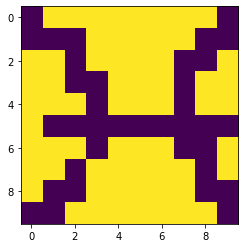

found match


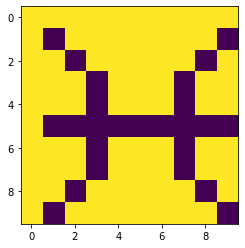

The best pattern that was selected based on potential was marked.


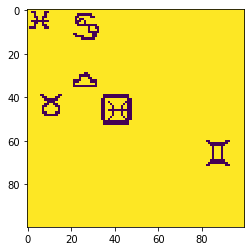

In [221]:
# find patterns
display_potential_method(pics[7])